In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

**NSL-KDD dataset Loading**

In [2]:
data_url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes",
    "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "target"
]
df = pd.read_csv(data_url, header=None, names=column_names)

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

Finding missing values of all features

In [5]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

**Data Preprocessing**

In [6]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=["protocol_type", "service", "flag"])

# Split the data into features (X) and labels (y)
X = df.drop("target", axis=1)
y = df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model Selection and Training**

In [7]:
import time

In [8]:
# Model 1: Support Vector Machine (SVM)
model_1 = SVC(kernel='linear')

start_time_1 = time.time()
model_1.fit(X_train_scaled, y_train)
end_time_1 = time.time()
Training_time_1 = end_time_1-start_time_1

start_test_time_1 = time.time()
svm_predictions = model_1.predict(X_test_scaled)
end_test_time_1 = time.time()
Testing_time_1 = end_test_time_1 - start_test_time_1

svm_accuracy = accuracy_score(y_test, svm_predictions)

In [9]:
# Model 2: Decision Tree
model_2 = DecisionTreeClassifier()

start_time_2 = time.time()
model_2.fit(X_train_scaled, y_train)
end_time_2 = time.time()
Training_time_2 = end_time_2 - start_time_2

start_test_time_2 = time.time()
dt_predictions = model_2.predict(X_test_scaled)
end_test_time_2 = time.time()
Testing_time_2 = end_test_time_2 - start_test_time_2

dt_accuracy = accuracy_score(y_test, dt_predictions)

In [10]:
# Model 3: Naive Bayes
model_3 = GaussianNB()

start_time_3 = time.time()
model_3.fit(X_train_scaled, y_train)
end_time_3 = time.time()
Training_time_3 = end_time_3 - start_time_3

start_test_time_3 = time.time()
nb_predictions = model_3.predict(X_test_scaled)
end_test_time_3 = time.time()
Testing_time_3 = end_test_time_3 - start_test_time_3

nb_accuracy = accuracy_score(y_test, nb_predictions)

**Model Evaluation**

In [11]:
print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

SVM Accuracy: 0.9993927432822226
Decision Tree Accuracy: 0.9995546784069632
Naive Bayes Accuracy: 0.7286675775517434


In [12]:
# Additional evaluation metrics
print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



SVM Classification Report:
                   precision    recall  f1-score   support

           back.       0.99      1.00      1.00       435
buffer_overflow.       0.86      0.67      0.75         9
      ftp_write.       1.00      1.00      1.00         1
   guess_passwd.       1.00      0.88      0.93         8
           imap.       1.00      1.00      1.00         3
        ipsweep.       0.99      0.99      0.99       265
           land.       1.00      1.00      1.00         1
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.00      0.00      0.00         1
        neptune.       1.00      1.00      1.00     21294
           nmap.       0.91      0.96      0.93        45
         normal.       1.00      1.00      1.00     19353
           perl.       0.25      1.00      0.40         1
            pod.       1.00      1.00      1.00        38
      portsweep.       0.99      1.00      1.00       236
          satan.       1.00      0.97     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Decision Tree Classification Report:
                   precision    recall  f1-score   support

           back.       1.00      1.00      1.00       435
buffer_overflow.       1.00      0.67      0.80         9
      ftp_write.       0.33      1.00      0.50         1
   guess_passwd.       0.70      0.88      0.78         8
           imap.       1.00      0.67      0.80         3
        ipsweep.       1.00      1.00      1.00       265
           land.       1.00      1.00      1.00         1
     loadmodule.       0.00      0.00      0.00         2
       multihop.       1.00      1.00      1.00         1
        neptune.       1.00      1.00      1.00     21294
           nmap.       0.96      0.98      0.97        45
         normal.       1.00      1.00      1.00     19353
           perl.       1.00      1.00      1.00         1
            pod.       1.00      1.00      1.00        38
      portsweep.       1.00      0.99      0.99       236
        rootkit.       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.


Naive Bayes Classification Report:
                   precision    recall  f1-score   support

           back.       0.11      1.00      0.20       435
buffer_overflow.       0.11      0.67      0.19         9
      ftp_write.       0.03      1.00      0.06         1
   guess_passwd.       1.00      0.88      0.93         8
           imap.       1.00      1.00      1.00         3
        ipsweep.       0.02      0.06      0.02       265
           land.       1.00      1.00      1.00         1
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.07      1.00      0.12         1
        neptune.       0.99      0.04      0.08     21294
           nmap.       0.11      0.96      0.20        45
         normal.       1.00      0.70      0.82     19353
           perl.       0.00      0.00      0.00         1
            pod.       0.27      1.00      0.43        38
      portsweep.       0.62      0.75      0.68       236
        rootkit.       0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
#Training time
print("SVM Training time:", Training_time_1)
print("Decision Tree Training time:", Training_time_2)
print("Naive Bayes Training time:", Training_time_3)

SVM Training time: 59.64976644515991
Decision Tree Training time: 4.6296350955963135
Naive Bayes Training time: 1.7924201488494873


In [14]:
#Testing time
print("SVM Testing time:", Testing_time_1)
print("Decision Tree Testing time:", Testing_time_2)
print("Naive Bayes Testing time:", Testing_time_3)

SVM Testing time: 11.865501165390015
Decision Tree Testing time: 0.05085945129394531
Naive Bayes Testing time: 1.8965342044830322


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

Function to plot bar chart for model metrics

In [16]:
def plot_model_metrics(accuracy_scores, precision_scores, recall_scores, f1_scores, model_names):
    ind = np.arange(len(model_names))
    width = 0.2

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(ind - width, accuracy_scores, width, label='Accuracy')
    rects2 = ax.bar(ind, precision_scores, width, label='Precision')
    rects3 = ax.bar(ind + width, recall_scores, width, label='Recall')
    rects4 = ax.bar(ind + 2 * width, f1_scores, width, label='F1 Score')

    ax.set_xticks(ind + width)
    ax.set_xticklabels(model_names)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

    plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization of metrics
    plt.title('Model Comparison Metrics')
    plt.show()

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

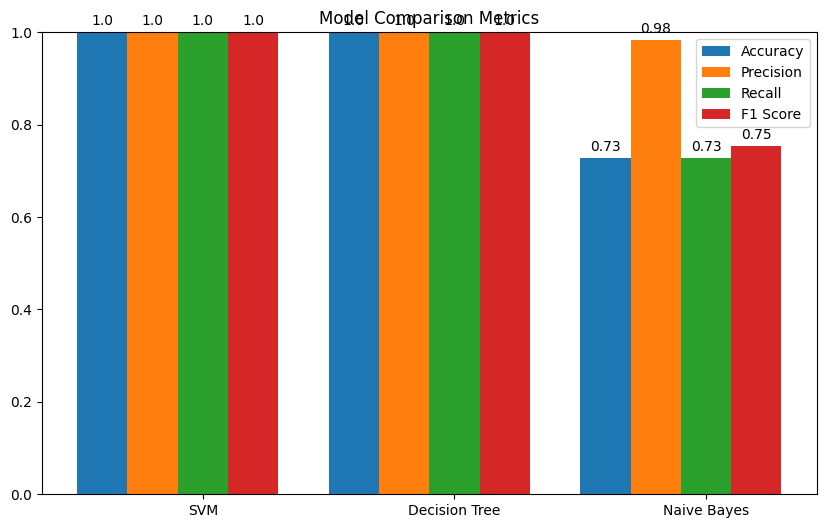

In [18]:
# Calculate metrics for each model
accuracy_scores = [svm_accuracy, dt_accuracy, nb_accuracy]
precision_scores = [
    precision_score(y_test, svm_predictions, average='weighted'),
    precision_score(y_test, dt_predictions, average='weighted'),
    precision_score(y_test, nb_predictions, average='weighted')
]

recall_scores = [
    recall_score(y_test, svm_predictions, average='weighted'),
    recall_score(y_test, dt_predictions, average='weighted'),
    recall_score(y_test, nb_predictions, average='weighted')
]

f1_scores = [
    f1_score(y_test, svm_predictions, average='weighted'),
    f1_score(y_test, dt_predictions, average='weighted'),
    f1_score(y_test, nb_predictions, average='weighted')
]

model_names = ['SVM', 'Decision Tree', 'Naive Bayes']

# Plot the bar chart
plot_model_metrics(accuracy_scores, precision_scores, recall_scores, f1_scores, model_names)

Analyzing the accuracy of each model.

<BarContainer object of 3 artists>

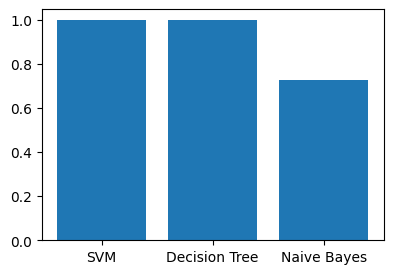

In [19]:
names = ['SVM', 'Decision Tree', 'Naive Bayes']
values = [svm_accuracy, dt_accuracy, nb_accuracy]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

Analyzing Training & Testing Time

<BarContainer object of 3 artists>

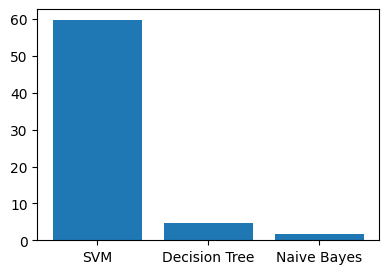

In [20]:
#Training_time_analysis
names = ['SVM', 'Decision Tree', 'Naive Bayes']
values = [Training_time_1, Training_time_2, Training_time_3]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

<BarContainer object of 3 artists>

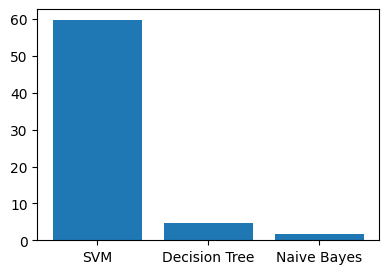

In [22]:
#Testing_time_analysis
names = ['SVM', 'Decision Tree', 'Naive Bayes']
values = [Training_time_1, Training_time_2, Training_time_3]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

Plotting confusion matrix for SVM

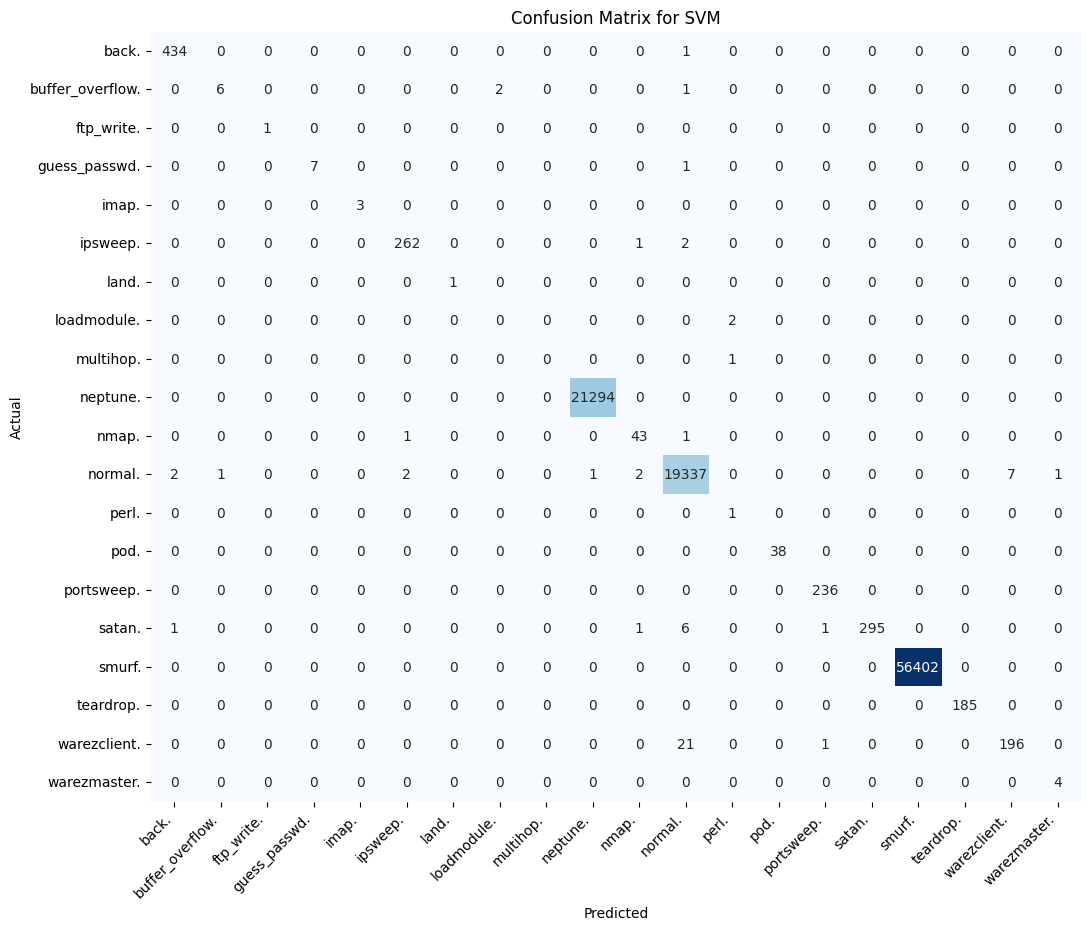

In [23]:
def plot_confusion_matrix_multiclass_svm(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
    plt.title('Confusion Matrix for SVM')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Usage for multiclass confusion matrix
plot_confusion_matrix_multiclass_svm(y_test, svm_predictions, labels=np.unique(y_test))

Plotting confusion matrix for Decision tree

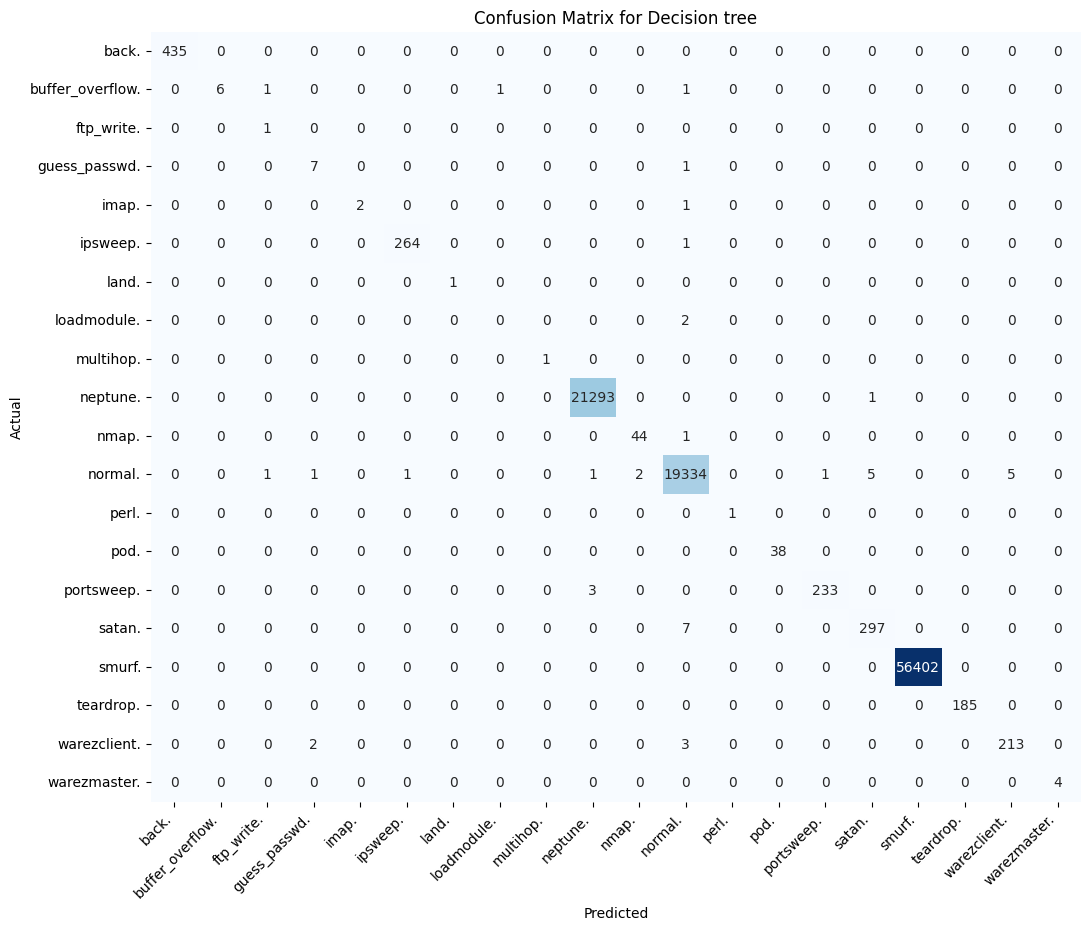

In [25]:
def plot_confusion_matrix_multiclass_dt(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
    plt.title('Confusion Matrix for Decision tree')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Usage for multiclass confusion matrix
plot_confusion_matrix_multiclass_dt(y_test, dt_predictions, labels=np.unique(y_test))

Plotting confusion matrix for Naive Bayes

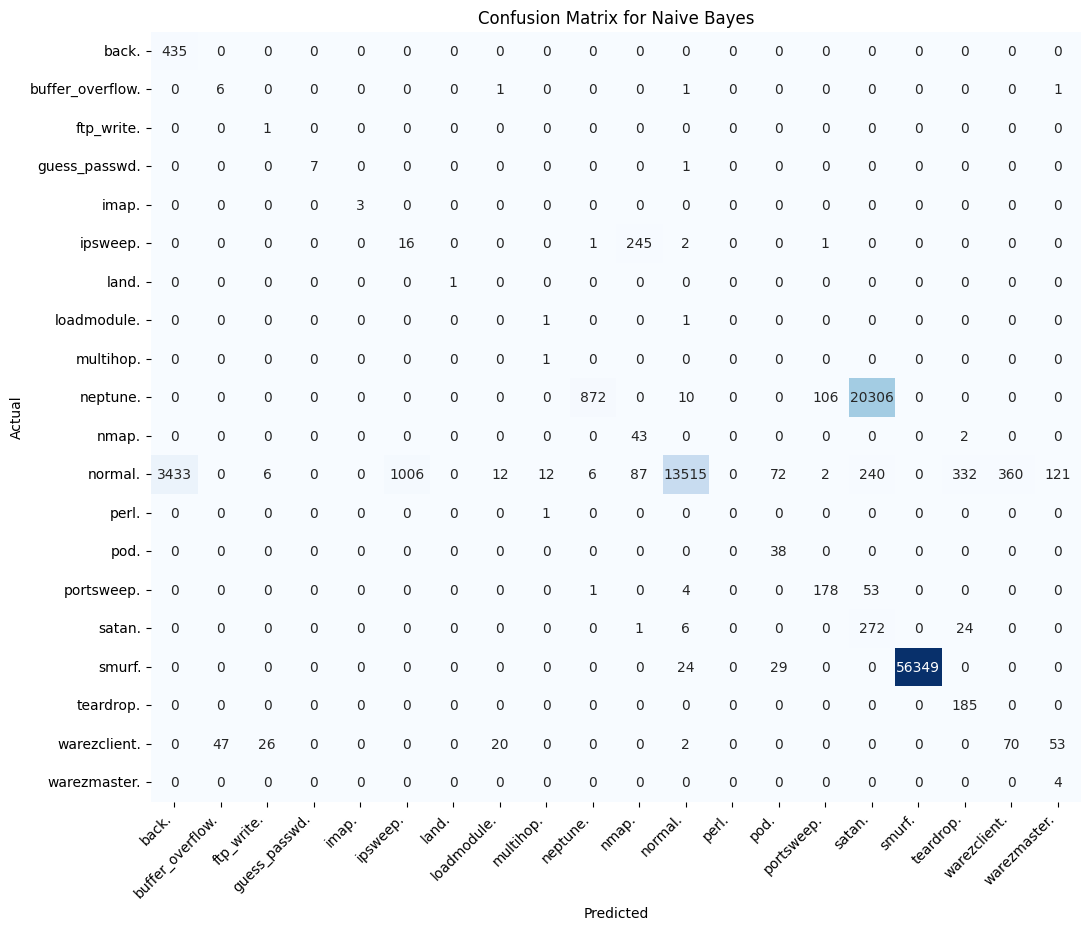

In [27]:
def plot_confusion_matrix_multiclass_nb(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
    plt.title('Confusion Matrix for Naive Bayes')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Usage for multiclass confusion matrix
plot_confusion_matrix_multiclass_nb(y_test, nb_predictions, labels=np.unique(y_test))